In [1]:
# Dependencies

In [2]:
import pandas as pd
from pathlib import Path

In [3]:
# Read the csv file into pandas
file_path = Path("Resources/myopia.csv")
df = pd.read_csv(file_path)
# Preview the Dataframe
df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [4]:
# Remove the 'myopic' column
new_df = df.drop(['MYOPIC'], axis='columns')
labels = df['MYOPIC']

In [5]:
new_df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Scale 
myopia_scaled = StandardScaler().fit_transform(new_df)
print(myopia_scaled[0:5])

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415 ]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415 ]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897]
 [-0.42021911 -0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715
   0.75948782  2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458
  -1.01302987  1.0032415 ]
 [-1.82397807 -0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813
   0.25709181 -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264
   0.98713773 -0.99676897]]


In [7]:
pca = PCA(n_components=2)

In [8]:
myopia_pca = pca.fit_transform(myopia_scaled)

In [9]:
df_myopia_pca = pd.DataFrame(
    data=myopia_pca, columns=["principal component 1", "principal component 2"]
)
df_myopia_pca.head()

,principal component 1,principal component 2
0,0.535503,1.145004
1,-0.624706,-1.575786
2,-0.933479,-0.717076
3,0.106354,1.192475
4,-0.388503,-2.839655


In [10]:
pca.explained_variance_ratio_

array([0.21177355, 0.15659716])

In [11]:
from sklearn.manifold import TSNE

In [12]:
# TSNE
tsne = TSNE(learning_rate=35)

In [13]:
tsne_features = tsne.fit_transform(new_df)

C:\Users\GAnGer\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [14]:
tsne_features.shape

(618, 2)

In [15]:
import matplotlib.pyplot as plt

In [16]:
new_df['x'] = tsne_features[:,0]
new_df['y'] = tsne_features[:,1]


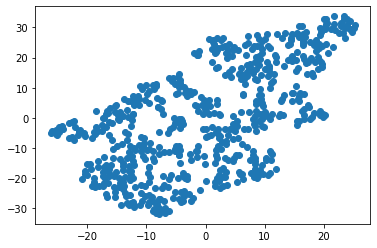

In [17]:
plt.scatter(new_df['x'], new_df['y'])
plt.show()

In [18]:
labels.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

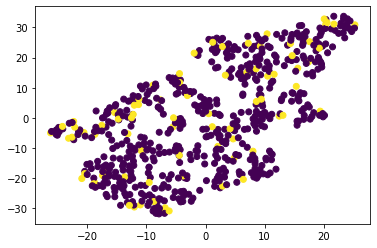

In [19]:
plt.scatter(new_df['x'], new_df['y'], c=labels)
plt.show()

In [20]:
from sklearn.cluster import KMeans

In [21]:
model = KMeans(n_clusters=2, random_state=5)

In [22]:
model.fit(new_df)

KMeans(n_clusters=2, random_state=5)

In [23]:
predictions = model.predict(new_df)
print(predictions)

[1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1
 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1
 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1
 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1
 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 1 1 0 0 

In [25]:
new_df["CLASS"] = model.labels_
new_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,x,y,class,CLASS
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,19.416100,2.227797,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,-10.954713,-22.344769,0,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,-1.614223,-10.851375,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,15.359417,10.450362,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,2.470917,-23.203997,0,0


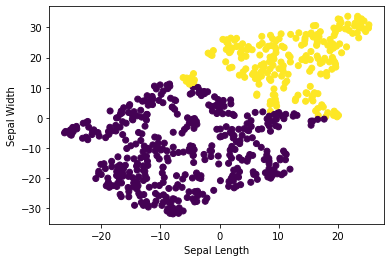

In [26]:
plt.scatter(x=new_df["x"], y=new_df['y'], c=new_df['class'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [31]:
inertia = []
k = list(range(1,11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(new_df)
    inertia.append(km.inertia_)
    
    
    
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

C:\Users\GAnGer\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


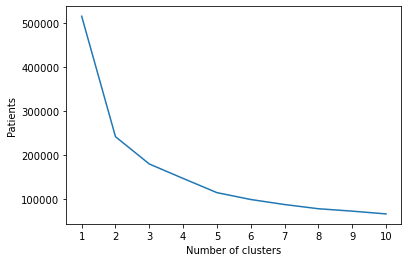

In [32]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Patients')
plt.show()

# Recommendations
Based on the findings, the elbow curve happens in the vicinity of 2. Yes the patients can be clustered into two clusters. 